<a href="https://colab.research.google.com/github/cedamusk/AI-N-ML/blob/main/Regularized_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularized Logistic Regression

##Import libraries and tools
1. NumPy- Used for numerical operations, arrays, and matrix computations.
2. Scikit-learn (`sklearn.datasets.make_classification`)- Generates a synthetic dataset for classifcation problems.
3. Scikit-learn (`sklearn.model_selection.train_test_split`)-Splits the dataset into training and testing sets.
4. Scikit-learn(`sklearn.linear_model.LogisticRegression`)-Implements the Logistic Regression model with regulariztion options (L1/L2).
5. Scikit-learn(`sklearn.metrics`)-Includes various performance metrics:
  * `confusion_matrix`-Creates a confusion matrix for classification performance.
  *`accuracy_score`- Computes the accuracy of the model.
  *`precision_score`-Measures the precision of the model.
  *`recall_score`-Measures the recall (sensitivity) of the model.
  *`f1_score`-Calculates the Receiver Operating Characteristic (ROC) curve.
  *`auc`- Computes the Area Under the Curve (AUC) of the ROC.
  `log_loss`- Computes the logistic loss (logarithmic loss function).

6. Matplotlib-Used for plotting graphs and visualizing results.
7. Seaborn-Enhances data visualization, typically for heatmaps and plots.

In [72]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

## Random Number generator
* This line sets the random seed for NumPy's random number generator to 42.
* Any function that invloves randomness will produce the same output every time the code is run.
*This ensures the reproducibility of results.

In [73]:
np.random.seed(42)

## Generate Synthetic dataset
* This cell generates a synthetic dataset for binary classification.

* The output variables include:
  * `X`- Feature matrix of shape (1000, 20), containing 1000 samples with 20 features each.
  * `y`- Target labels (0 or 1) of shape (1000, ).

In [74]:
X, y=make_classification(
    n_samples=1000, #Creates 1,000 data points (rows).
    n_features=20, #Each data point has 20 features (columns)
    n_classes=2, #This is a binary classification problem (labels: 0 or 1)
    n_clusters_per_class=2, #Each class has 2 clusters of data points
    n_redundant=5, #5 features are redundant (i.e., they are linear combinations of informative features)
    n_informative=15, #15 features actually carry information useful for classification
    random_state=42 #Ensures reproducibility (consistent dataset every time the code is run)
)

## Split dataset
* This cell splits the dataset into training and testing sets using `train_test_split()` from `sklearn.model_selection`.

###Breakdown of parameters:
* `X,y`- The feature matrix (`X`) and target labels (`y`) from the generated dataset.
* `test_size=0.2`: 20% of the data (200 samples) is allocated for testing, while 80% (800 samples) is used for training.

* `random_state=42`: Ensures the same split occurs every time for reproducibility.

### Output variables
* `X_train`: Training features (80% of X)
* `X_test`: Testing features (20% of X).
*`y_train`: Training labels (80% of y).
* `y_test`: Testing labels (20% of y).

* This step is essential for evaluating the model's performance on unseen data, ensuring it generalizes well rather than memorizing the training set.

In [75]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Regularized Logistic Regression Model
* This cell initializes and trains a Regularized Regression Model using Scikit's learn's `LogisticRegression`.

###Breakdown of parameters
* `C=1.0`- Inverse of regularization strength (default is 1.0).
  * Lower values (e.g., `C=1.0`) increase regularization (stronger penalty).
  * Higher values (e.g., `C=10`) redue regularization (weaker penalty).

* `penalty='l2'`- Applies L2 regularization to prevent overfitting by penalizing large coefficients.
* `random_state=42`- Ensures reproducibility.

### Training the model
* `model.fit(X_train, y_train)`- Fit (trains) the logistic regression model using the training data (`X_train, y_train`).

* The model learns the best weights (coefficients) for each feature in order into classify the data into 0 or 1.


* This step completes the training process. The model is now ready for predictions and evaluation.



In [76]:
model=LogisticRegression(
    C=1.0,
    penalty='l2',
    random_state=42
)

model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Make predictions
* This cell makes predictions using the trained Logistic Regression model.

1. `y_pred=model.predict(X_test)`
  * Uses the trained model to predict class labels (0 or 1) for the test set (`X_test`).
  * The output `y_pred` is an array of binary predictions.

2. `y_pred_proba=model.predict_proba(X_test)[:, 1]`
  * Computes the probability estimates for each test sample.
  * `predict_proba(X_test)` returns a 2D array with probabilities for both classes (`[:,0]` for class 0, `[:, 1]` for class 1).
  * `[:, 1]` extracts only the probabilities for class 1 (the model's confidence that a sample belongs to class 1).


In [77]:
y_pred=model.predict(X_test) #(Binary labels) useful for accuracy, confusion matrix, and classification reports
y_pred_proba=model.predict_proba(X_test)[:, 1] #(Probabilities) is needed for ROC Curves, AUC Scores, and log loss calculations

## Confusion Matrix calculation
* The confusion matrix is a performance evaluation tool for classification models. It provides a breakdown of predictions into four categories.
  * True positives (TP): Correctly predicted class 1 instances.
  * True Negatives (TN): Correctly predicted class 0 instances.
  * False Positives (FP): Incorrectly predicted class 1 instances (Type I error).
  * False Negatives (FN): Incorrectly predicted class 0 instances (Type II error).

* This helps in calculating precision, recal, and F1-Score.

In [78]:
conf_matrix=confusion_matrix(y_test, y_pred)

## Performance metrics calculation
* Accuracy: $ Accuracy=\frac{TP+TN}{TP+TN+FP+FN} $
  * Measures the proportion of correctly classified instances out of all instances.
* Precision: $ Precision=\frac{TP}{TP+FP} $
  * The ratio of correctly predicted positive observations to total predicted positives. Higher precision means fewer false positives.

* Recall (sensitivity): $ Recall =\frac{TP}{TP+FN} $

  * The ability of the model to correctly identify positive instances. High recall means fewer false negatives.

* F1-Score: $ F_1=2 \times \frac{\text {Precision} \times \text{Recall}}{\text{Precision}+\text {Recall}} $

* Log Loss(Logarithmic Loss):
  * Measures how uncertain the model's probability estimates are. Lower values indicate better probability calibration.

In [79]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
logloss=log_loss(y_test, y_pred_proba)

## ROC curve and AUC calculation
* The ROC (Receiever Operating Characteristic) curve and AUC (Area Under the Curve) are key metrics for evaluating classification models, especially for imbalanced datasets.
* `roc_curve(y_test, y_pred_proba)`
  * Computes the False Positive Rate (FPR) and the True Positive Rate (TPR) at different classification thresholds.
  * FPR (x-axis): The proportion of negative instances incorrectly classified as positive.
  * TPR(y-axis): The proportion of actual positives correctly classified as positive.
  * The function returns these values: `fpr`, `tpr`, and these thresholds (ignored here using `_`)

* `auc(fpr, tpr)`
  * Computes the Area Under the ROC Curve (AUC_ROC), which summarizes the performance across all classification thresholds.
  * AUC ranges from 0 to 1:
    * 1.0: Perfect model
    * 0.5: Random guessing
    * <0.5: Worse than random guessing (model is misclassyfing)

* A model with high AUC is better at distinguishing between classes.
* The ROC curve helps in choosing an optimal threshold where the balance between sensitivity (recall) and specificity is most desirable.

In [80]:
fpr, tpr, _=roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr, tpr)

## Creating a figure for visualization

In [81]:
plt.figure(figsize=(20, 20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

## Plotting the confusion matrix

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

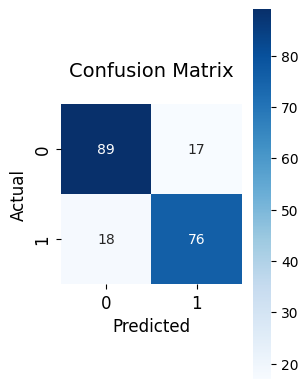

In [82]:
plt.subplot(1,2,1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            square=True)
plt.title('Confusion Matrix', fontsize=14, pad=20)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## Plotting the ROC curve


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

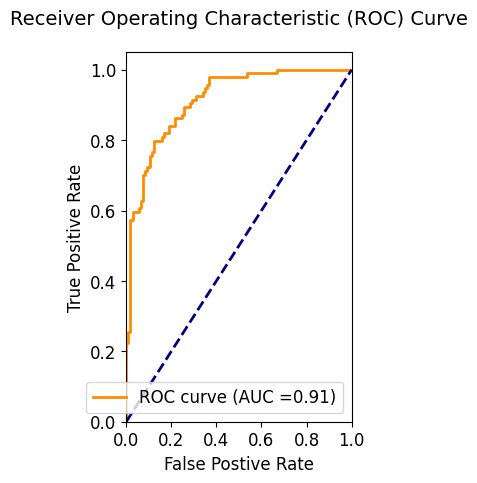

In [83]:
plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC ={roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


## Displaying Model evaluation metrics

In [84]:
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Model Evaluation Metrics:
Accuracy: 0.8250
Precision: 0.8172
Recall: 0.8085
F1 Score: 0.8128
Log Loss: 0.3701
AUC-ROC: 0.9137


## Finalizing the visualization

In [85]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>